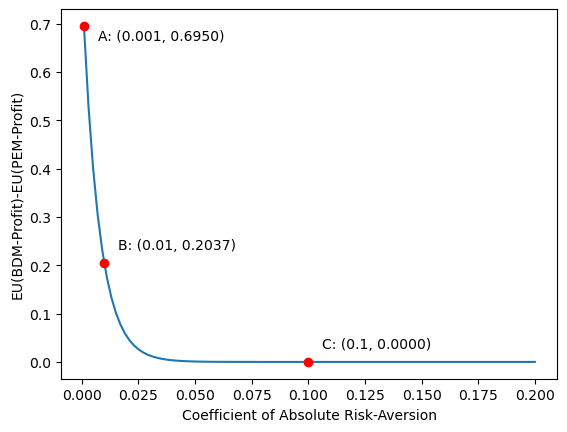

In [156]:
# Import required libraries for plotting and numerical operations
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

# Define function to calculate difference between two utility functions. The number is rescaled to be measured under $1000.
def calculate_y(a):
  return (((1 - np.exp(-a*136.74037+((a*0.2530)**2)/2)) / a)-((1 - np.exp(-a*135.94381))/ a))

# Create array of a values from 0.001 to 0.2 with 100 points
a_values = np.linspace(0.001, 0.2, 100)
# Calculate corresponding y values using list comprehension
y_values = [calculate_y(a) for a in a_values]

# Set up the plot
fig, ax = plt.subplots()  # Create figure and axes objects
line, = ax.plot(a_values, y_values)
ax.set_xlabel("Coefficient of Absolute Risk-Aversion")  # Label x-axis
ax.set_ylabel("EU(BDM-Profit)-EU(PEM-Profit)")  # Label y-axis
# ax.set_title("Relationship between a and y")

# Add data labels and points for specific a values
specific_a = [0.001, 0.01, 0.1]
labels = ['A', 'B', 'C']  # Labels for each point
for a, label in zip(specific_a, labels):
    y = calculate_y(a)
    ax.plot(a, y, 'ro')  # Add red dot on the curve
    # Adjust text position for a=0.001 to keep it inside the chart
    if a == 0.001:
        xytext = (10, -10)
    else:
        xytext = (10, 10)
    ax.annotate(f'{label}: ({a}, {y:.4f})', 
                xy=(a, y), 
                xytext=xytext,
                textcoords='offset points')

# Add interactive cursor that shows coordinates when hovering over the line
mplcursors.cursor(line, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(
        f"a: {sel.target[0]:.4f}, y: {sel.target[1]:.4f}"
    )
)


# After creating your chart/plot, use the following command to save it
plt.savefig('riskaversion.png', dpi=300, bbox_inches='tight')

# Display the plot as well
plt.show()